In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


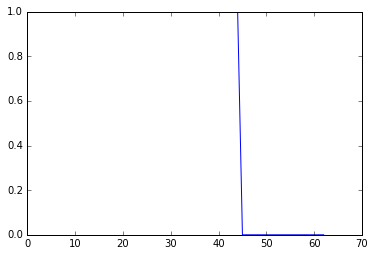

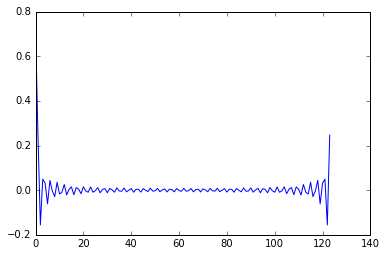

In [66]:
passband = (8000.0 / 11025.0) * np.pi
ntaps = 125

nbins = ntaps // 2 + 1
passband_bins = int((passband / np.pi) * nbins)
ideal_spec_m = np.concatenate([np.ones(passband_bins), np.zeros(nbins - passband_bins)])
ideal_spec_p = np.zeros(nbins)
ideal_spec = ideal_spec_m * np.exp(1j * ideal_spec_p)
plt.figure()
plt.plot(ideal_spec_m)

ideal_filter = np.fft.irfft(ideal_spec)
plt.figure()
plt.plot(ideal_filter)

C:\Anaconda2\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


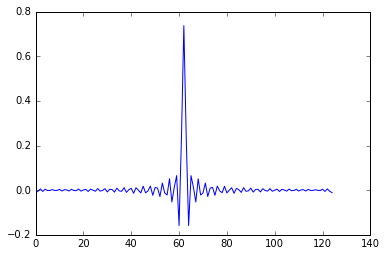

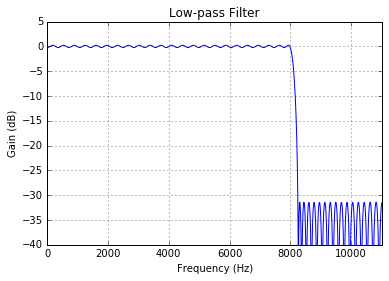

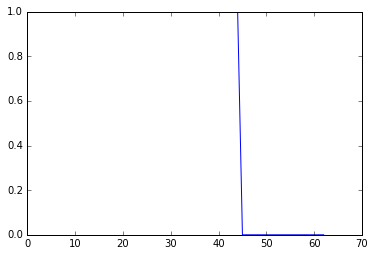

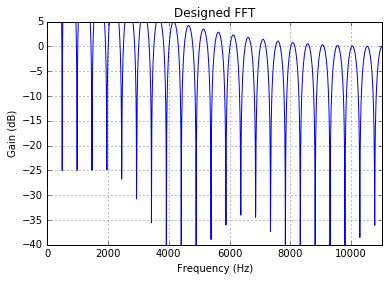

In [70]:
from scipy import signal

def plot_response(fs, w, h, title):
    plt.figure()
    plt.plot(0.5*fs*w/np.pi, 20*np.log10(np.abs(h)))
    plt.ylim(-40, 5)
    plt.xlim(0, 0.5*fs)
    plt.grid(True)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain (dB)')
    plt.title(title)


# Low-pass filter design parameters
fs = 22050.0       # Sample rate, Hz
cutoff = 8000.0    # Desired cutoff frequency, Hz
trans_width = 250  # Width of transition from pass band to stop band, Hz
numtaps = 125      # Size of the FIR filter.

taps = signal.remez(numtaps, [0, cutoff, cutoff + trans_width, 0.5*fs],
                    [1, 0], Hz=fs)
w, h = signal.freqz(taps, [1], worN=2000)

plt.figure()
plt.plot(taps)
plot_response(fs, w, h, "Low-pass Filter")

plt.figure()
w, h = signal.freqz(ideal_spec, [1], worN=2000)
plt.plot(ideal_spec)
plot_response(fs, w, h, "Designed FFT")

(2L, 22050L)


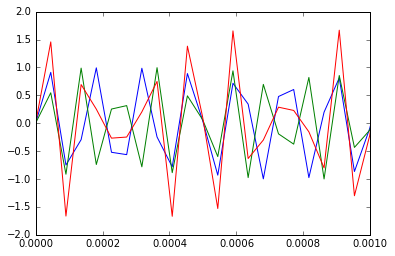

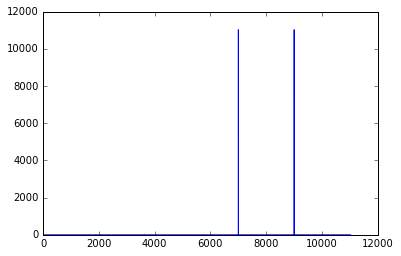

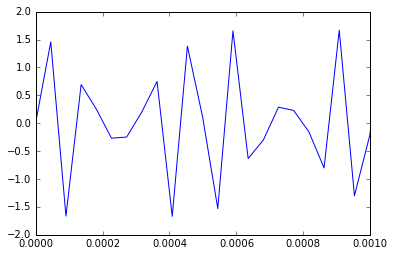

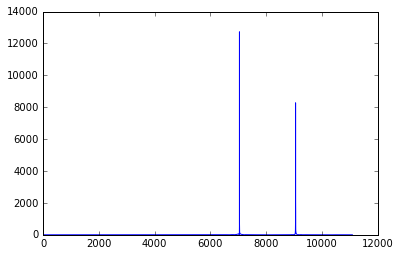

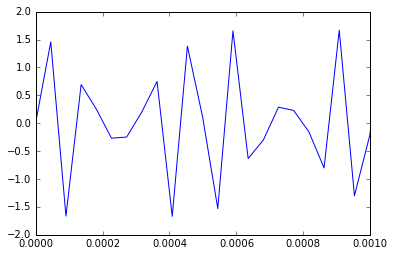

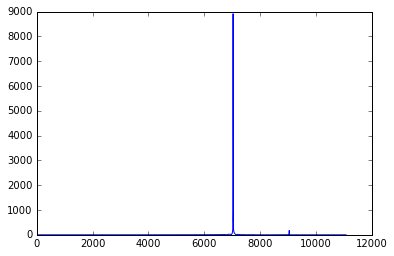

In [68]:
dt = 1.0 / fs
t = np.arange(0.0, 1.0, dt)
f = np.array([7000.0, 9000.0])
xarr = np.sin(2.0 * np.pi * t[np.newaxis] * f[np.newaxis].T)
print xarr.shape
x = np.sum(xarr, axis=0)
plt.figure()
plt.plot(t, xarr[0, :])
plt.plot(t, xarr[1, :])
plt.plot(t, x)
plt.xlim([0.0, 0.001])
plt.figure()
plt.plot(np.absolute(np.fft.rfft(x)))

x_filt = np.convolve(x, ideal_filter)
plt.figure()
plt.plot(t, x)
plt.xlim([0.0, 0.001])
plt.figure()
plt.plot(np.absolute(np.fft.rfft(x_filt)))

x_filt = np.convolve(x, taps)
plt.figure()
plt.plot(t, x)
plt.xlim([0.0, 0.001])
plt.figure()
plt.plot(np.absolute(np.fft.rfft(x_filt)))